<a href="https://colab.research.google.com/github/robertdshaw/robertdshaw/blob/main/FINAL_US_Visa_Case_Robert_Shaw_Fullcode_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

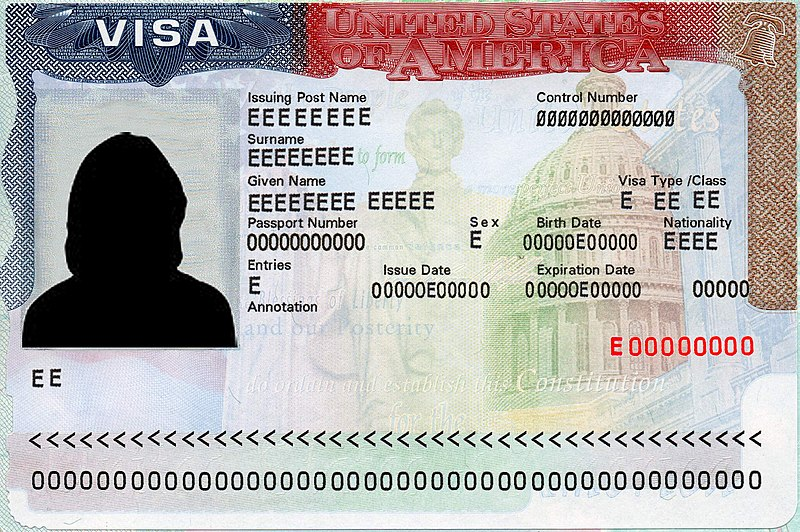


<b><h2><center>US Visa Case Study</center></h2></b>

## Problem Statement

### Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description:

- case_id: ID of each visa application
- continent: Information on continent the employee comes from
- education_of_employee: Information on education of the employee
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information on foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position for full-time work? Y = Full-Time Position; N = Part-Time Position
- case_status: Flag indicating if the Visa was certified or denied

## Import necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
%%shell
jupyter nbconvert --to html //content/FINAL_US_Visa_Case_Robert_Shaw_Fullcode_2022.ipynb

[NbConvertApp] Converting notebook //content/FINAL_US_Visa_Case_Robert_Shaw_Fullcode_2022.ipynb to html
[NbConvertApp] Writing 1534402 bytes to //content/FINAL_US_Visa_Case_Robert_Shaw_Fullcode_2022.html


## Reading the dataset

In [ ]:
visa = pd.read_csv('EasyVisa.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = visa.copy()

## Overview of the dataset

### Displaying the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
data.shape

(25480, 12)

* There are 25,480 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [ ]:
data.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations-**
* There is a mix of both object and numeric types. We will have to convert all object types.
* There are no missing values in the data.

In [ ]:
data.duplicated().sum()

0

There are no duplicates in the data.

### Summary of the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations-**
* The maximum number of employees is over 600,000 and the third quartile value is just over 3500 i.e. at least 75% of companies have about 3500 employees or below. There are likely outliers in this data, as there is a big difference between the 3rd quartile and maximum values.
* The average prevailing wage for similarly employed workers in the area of intended employment is quite high at close to 75,000 USD. Again, there appears to be outliers in the data given that the max wage is excessively high at over 300,000 USD.

In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

We can drop 'case_id' column as it is an ID variable and will not add value to the model.

In [ ]:
data.drop(columns=['case_id'], inplace=True)

## Exploratory Data Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [ ]:
# Here we calculate the rows with negative employees in the data
data.loc[data["no_of_employees"] < 0].shape

(33, 11)

* We can see that there are 33 rows that have negative values for the number of employees.

In [ ]:
# We convert negative employee rows to positive numbers using the absolute function
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
case_status,25480.0,0.667896,0.470977,0.0000,0.00,1.00,1.0000,1.00


* We can now see that there are no longer negative values included in the data on the number of employees in each company.

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

* We see that most employees do not require job training.
* Most wages are paid on the basis of yearly employment.
* There are much more applicants for full-time positions than not.
* Close to one third of applicants are denied a visa.

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

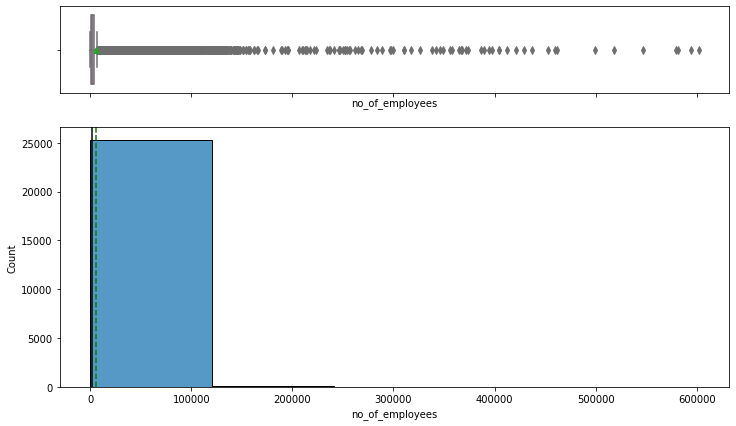

In [ ]:
histogram_boxplot(data,'no_of_employees', bins=5)

* The distribution is not symmetric with several outliers to the right. 
* That said, as detailed earlier, 75% of companies have under 3504 employees.
* The outliers present to the right indicate some international big firms have an extremely large number of employees.

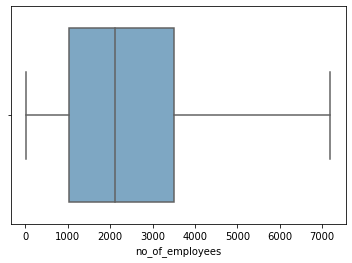

In [ ]:
#Given large number of outliers, we can turn them off to be able to better interpret the boxplot.
sns.boxplot(data['no_of_employees'],showfliers=False,palette='PuBu');

* The median number of employees is just over 2000, with 50% of companies having between 1000 and 3500 employees.

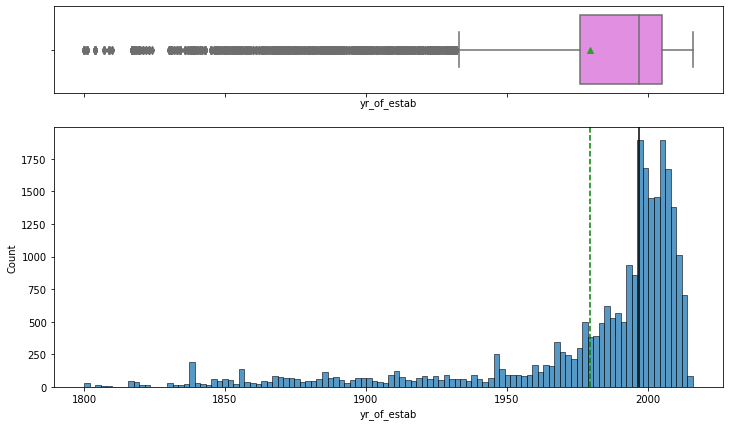

In [ ]:
histogram_boxplot(data,'yr_of_estab')

- The graph is significantly skewed to the left with the average year of establishment being in the 1980s.
- 75% of companies were created between 1980 and the present, while still they are a range of outliers with some companies existing since 1800.

#### Observations on prevailing wage

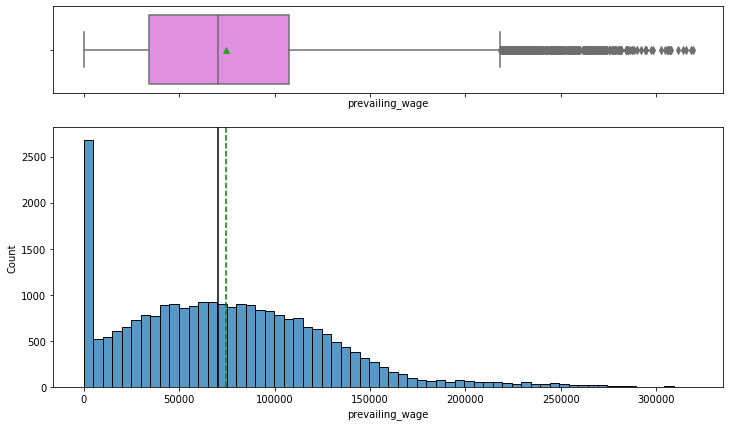

In [ ]:
histogram_boxplot(data,'prevailing_wage')

* The prevailing wage does not have a normal distribution with a peak of around 10% of all average wages being close to zero, indicating low-paid hourly jobs
* The average wage is just under 75,000 per year.
* There are several outliers to the right, indicating that certain high-end jobs with fixed, yearly employment have a very high average wage.

In [ ]:
data.loc[data["prevailing_wage"]< 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
data.loc[data["prevailing_wage"]< 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

* Less than 1% of jobs on offer have an average wage of less than 100 USD, with all of these jobs being for hourly rates.

In [ ]:
# Here we use barplots for categorical columns
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

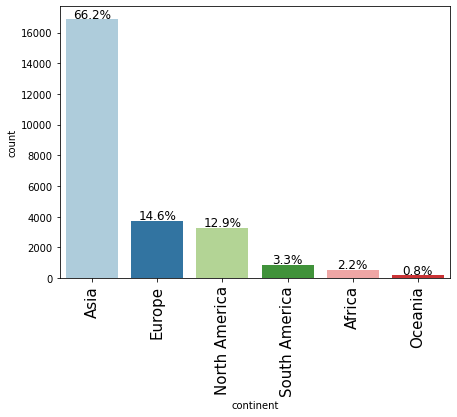

In [ ]:
labeled_barplot(data,"continent",perc=True)

- Over 80% of applicants come from Asia and Europe.
- Less than 7% of applicants come from South America, Africa and Oceania combined. 

#### Observations on employee education

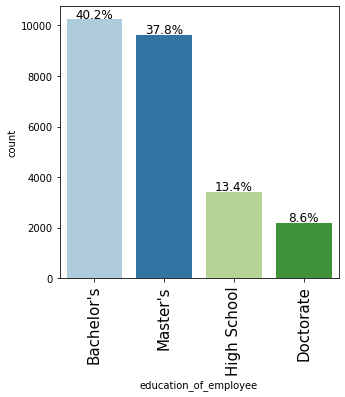

In [ ]:
labeled_barplot(data,"education_of_employee",perc=True)

* Close to 80% of all applicants have at least a bachelor's or a master's degree.

* Less than 15% of all applicants have only finished high school and not gone to University.

#### Observations on the level of previous job experience 

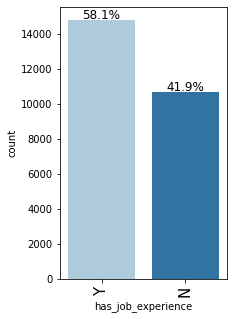

In [ ]:
labeled_barplot(data,"has_job_experience",perc=True)

* The data is relatively well split with close to 60% having previous experience, while 40% do not.

#### Observations on job training requirements

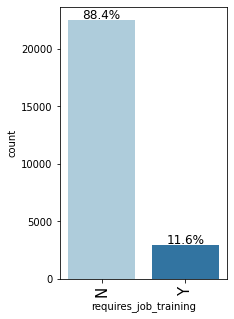

In [ ]:
labeled_barplot(data,"requires_job_training",perc=True)

* The majority (88%) of applicants do not require job training.

#### Observations on the region of employment

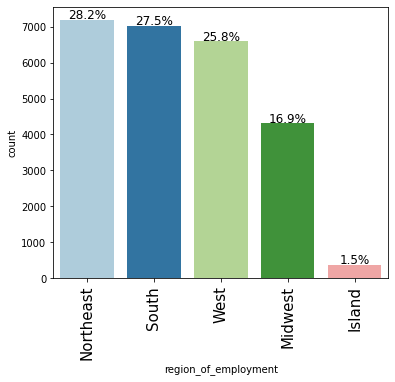

In [ ]:
labeled_barplot(data,"region_of_employment",perc=True)

* Over 80% of applicants target the Northeast, South and West regions in the US.
* Less than 17% of applicants want to go to the Midwest.

#### Observations on the unit of wage

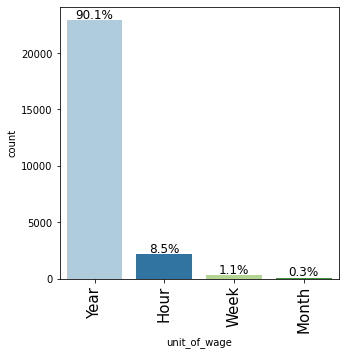

In [ ]:
labeled_barplot(data,"unit_of_wage",perc=True)

* As previously noted, 90% of salaries are linked to yearly pay structures.

#### Observations on full-time position status

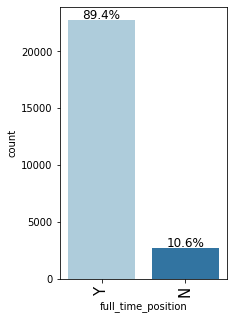

In [ ]:
labeled_barplot(data,"full_time_position",perc=True)

* 90% of jobs are for full-time positions.

#### Observations on case status

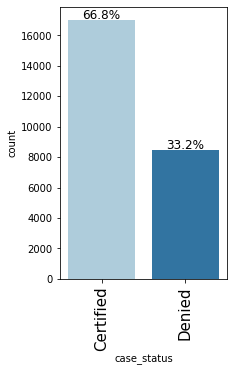

In [ ]:
labeled_barplot(data,"case_status",perc=True)

* The split between visas approved and denied is approx 67% in favour and 33% against.

### Bivariate Analysis

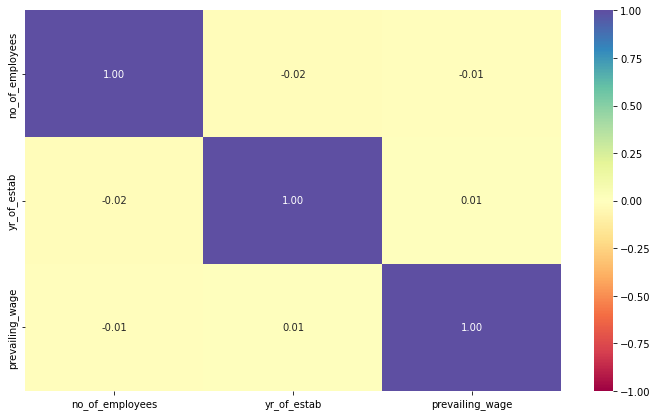

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is no correlation in the data.

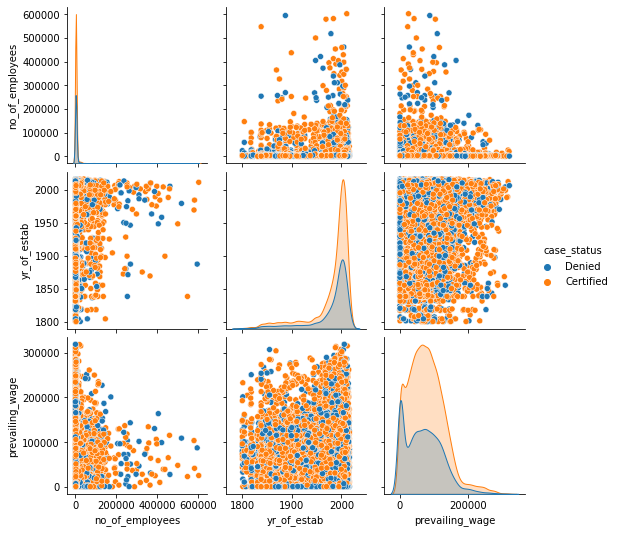

In [ ]:
sns.pairplot(data,hue='case_status')
plt.show()

* There is overlap in the distribution of variables for both classes. Let's explore this further using other plots.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Prints the category counts and plots a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Case Status Vs Education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


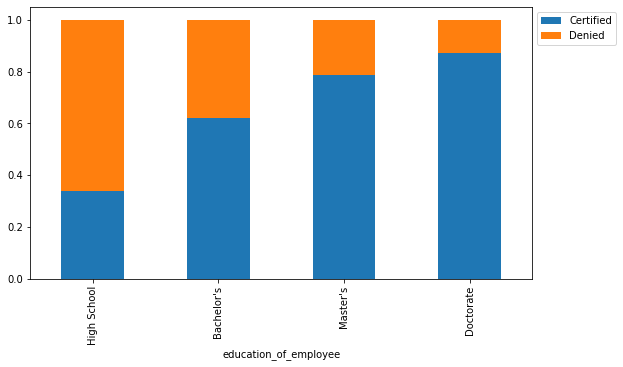

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

* Higher education levels lead to higher visa approvals, with a PhD applicant being approved 90% of the time, while a high school-level applicant only gets approved 36% of the time.

#### Case Status Vs Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


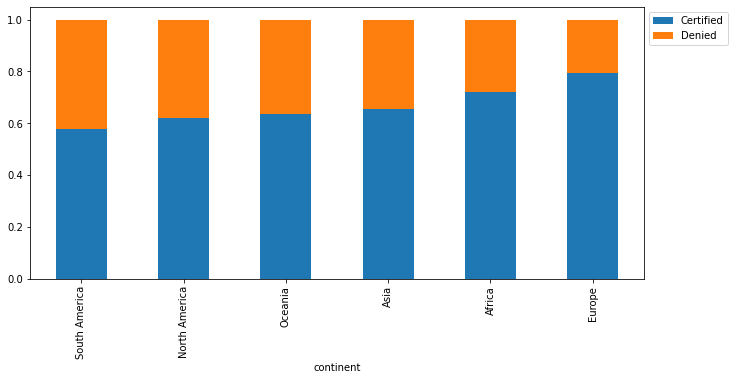

In [ ]:
stacked_barplot(data, "continent", "case_status")

* Applicants from Europe have the highest approval level at close to 80%, while South America has the lowest at just under 60%.


#### Case Status Vs Work Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


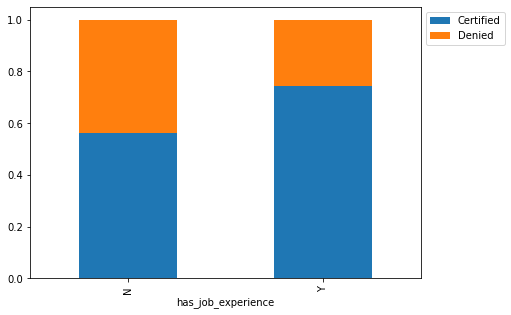

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

* Applicants with job experience have a 76% chance of approval.

#### Case Status Vs Unit of Wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


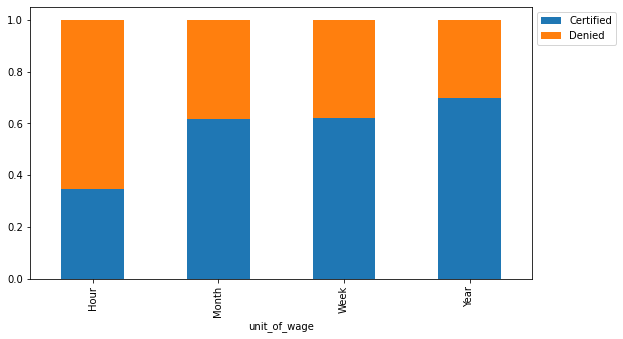

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Hourly-paid jobs lead to a low visa approval rate of 36%, while yearly-contracted jobs have almost a 70% approval rate.

#### Case Status Vs Prevailing Wage

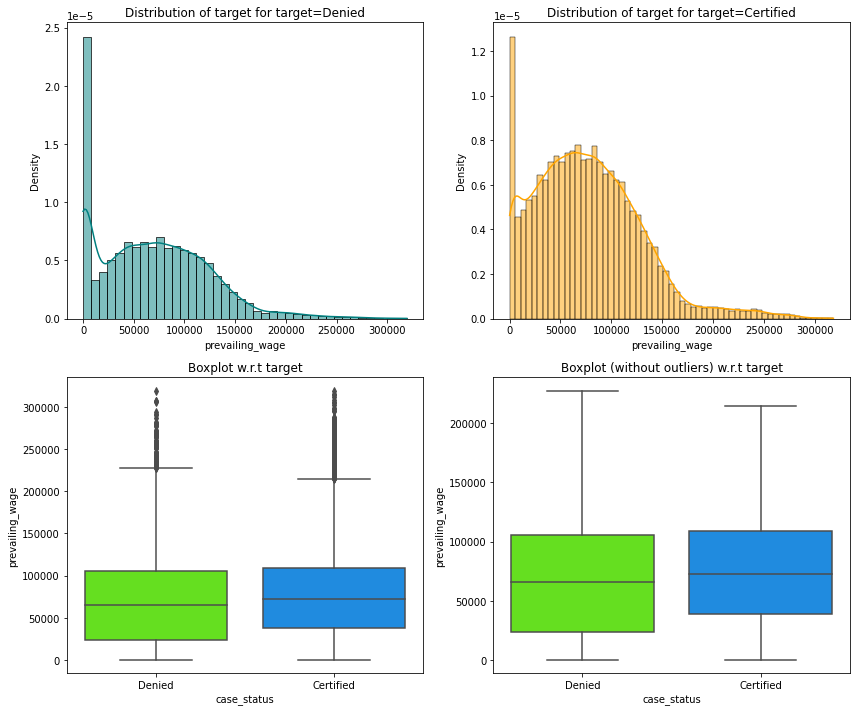

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* The higher the prevailing wage, the more visas are approved. 

## Data Preprocessing

### Data Preparation for Modeling

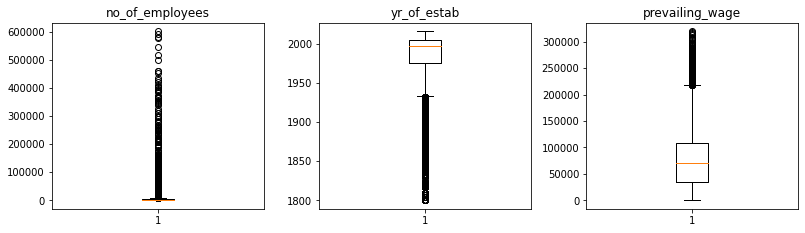

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.

In [ ]:
data["case_status"] = data["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0)

In [ ]:
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

In [ ]:
# We create dummy variables for the non-numerical values
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)


In [ ]:
Y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

We had seen that around 66.8% of observations belongs to class 1 (Approved Visa) and 33.2% observations belongs to class 0 (Visa Denied), and this is preserved in the train and test sets

## Model evaluation criterion

### The Model can make wrong predictions as:

1. The Model predicts that the visa application will get certified, but in reality the visa application gets denied.
2. The Model predicts that the visa application will not get certified, but in reality the visa application gets certified. 

### Which case is more important? 
* Both cases are important as:

* If a visa is certified when it should have been denied, a foreign employee will get the job instead of a U.S. citizen who will miss out on the job opportunity.

* If a visa is denied when it should have been approved, the U.S. will lose a properly qualified human resource who can contribute to the economy. 

### How to reduce the losses?

* The 'F1 Score' can be used as the metric for evaluation of the model, as the greater the F1 score is the higher the chances of minimizing both False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


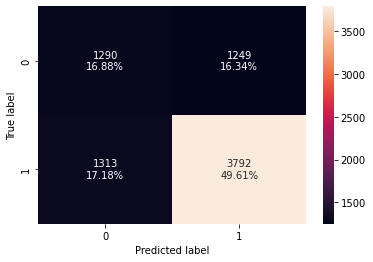

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5, 16, 5), 
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 5],
              'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


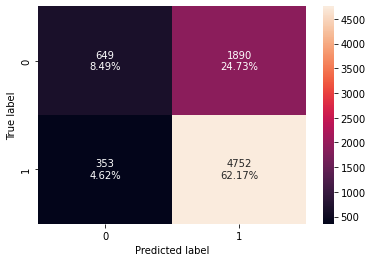

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting remains the same and the testing performance doesn't change either.
* We will therefore try some other models.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


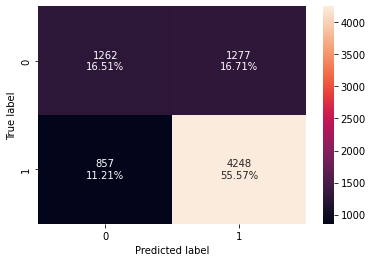

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5, 15 ,5)),
                'max_features': ['sqrt','log2'],
                'min_samples_split': np.arange(5, 7),
                'n_estimators': np.arange(15, 26, 5)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=6,
                       n_estimators=25, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.769679  0.924704   0.774302  0.842846
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738749  0.901273   0.755005  0.821681


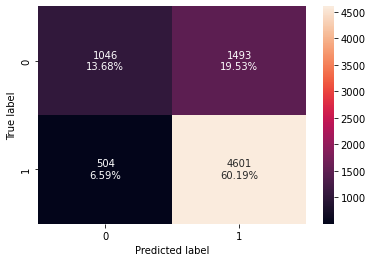

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced significantly and the model performance has improved.
* The test recall and test f1-score have increased.

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
   Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


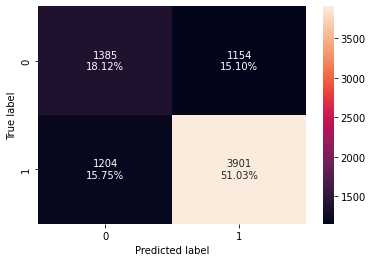

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7, 0.9], 
              'max_features': [0.7, 0.9],
              'n_estimators' : [90, 111, 10],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=111,
                  random_state=1)

   Accuracy    Recall  Precision       F1
0  0.995739  0.999916   0.993743  0.99682
   Accuracy    Recall  Precision        F1
0  0.726975  0.897943   0.745366  0.814571


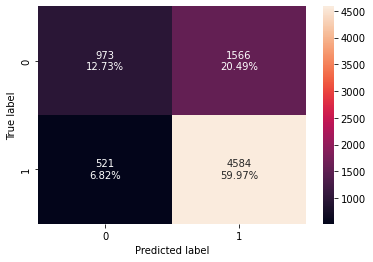

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The tuned model is still overfitting the data.
* Let's try now try boosting models.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


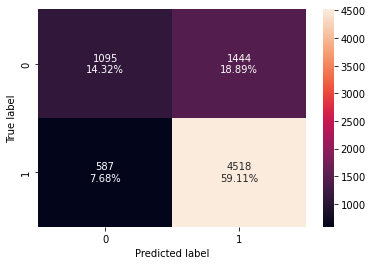

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test f1-score is a bit lower than the tuned Random Forest model. 

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=1,
                                                        random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=80,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.724938  0.920003   0.734929  0.817118
   Accuracy    Recall  Precision        F1
0  0.715594  0.919295   0.727033  0.811938


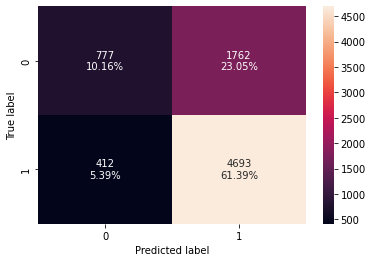

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The model performance has decreased slightly and the f1 score is still a bit low.

### Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


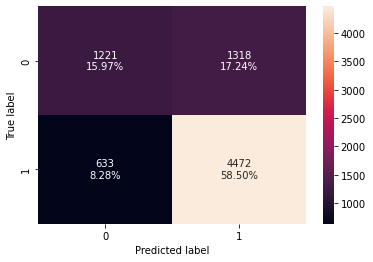

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is generalizing well and has a slightly better f1 score.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


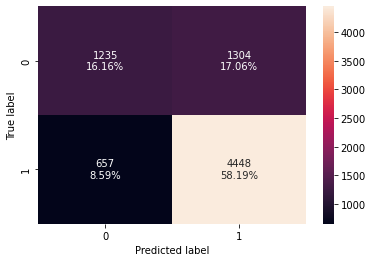

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756279  0.883573   0.780513  0.828852
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744636  0.877375   0.771576  0.821082


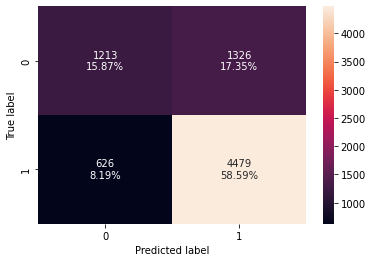

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* XGBoost classifier is generalizing well the training and test data.
* The f1 score is similar to some of the previous models, so we'll try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

    
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756504  0.883069   0.780995  0.828901
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.744244  0.8762   0.771739  0.820659


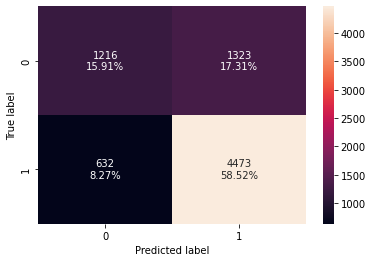

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The model is no longer overfitting but there is not much difference in the f1 score.

## Stacking Model

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Ada Boost', abc_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=6,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Ada Boost',
             

Training performance:
    Accuracy    Recall  Precision        F1
0  0.768166  0.883321   0.793111  0.835789
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744113  0.868364   0.775407  0.819257


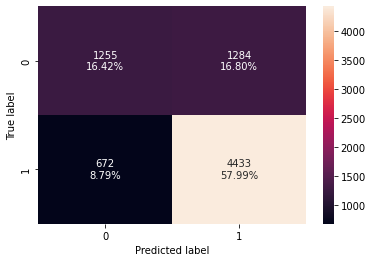

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost.
* The confusion matrix shows that the model can identify the majority of correct visa approvals and denials, but it is better at identifying false negatives, i.e. incorrect denials.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.999944,0.769679,0.985198,0.995739,0.738226,0.724938,0.758802,0.764017,0.756279,0.756504,0.768166
Recall,1.0,1.0,0.999916,0.924704,0.985982,0.999916,0.887182,0.920003,0.883740,0.882649,0.883573,0.883069,0.883321
Precision,1.0,1.0,1.000000,0.774302,0.991810,0.993743,0.760688,0.734929,0.783042,0.789059,0.780513,0.780995,0.793111
F1,1.0,1.0,0.999958,0.842846,0.988887,0.996820,0.819080,0.817118,0.830349,0.833234,0.828852,0.828901,0.835789


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.664835,0.720827,0.738749,0.691523,0.726975,0.734301,0.715594,0.744767,0.743459,0.744636,0.744244,0.744113
Recall,0.742801,0.742801,0.832125,0.901273,0.764153,0.897943,0.885015,0.919295,0.876004,0.871303,0.877375,0.876200,0.868364
Precision,0.752232,0.752232,0.768869,0.755005,0.771711,0.745366,0.757799,0.727033,0.772366,0.773296,0.771576,0.771739,0.775407
F1,0.747487,0.747487,0.799247,0.821681,0.767913,0.814571,0.816481,0.811938,0.820927,0.819379,0.821082,0.820659,0.819257


* The Decision Tree, Random Forest and Bagging classifier models are overfitting the training data in terms of f1-score.
* The XGBoost classifier is giving the highest f1-score on the test data and marginally has the best balance between Precision and Recall.
* The top 3 models are Gradient Boost, XGBoost and Stacking Classifiers. They are all giving a similar performance. 

### Feature importance of the final model

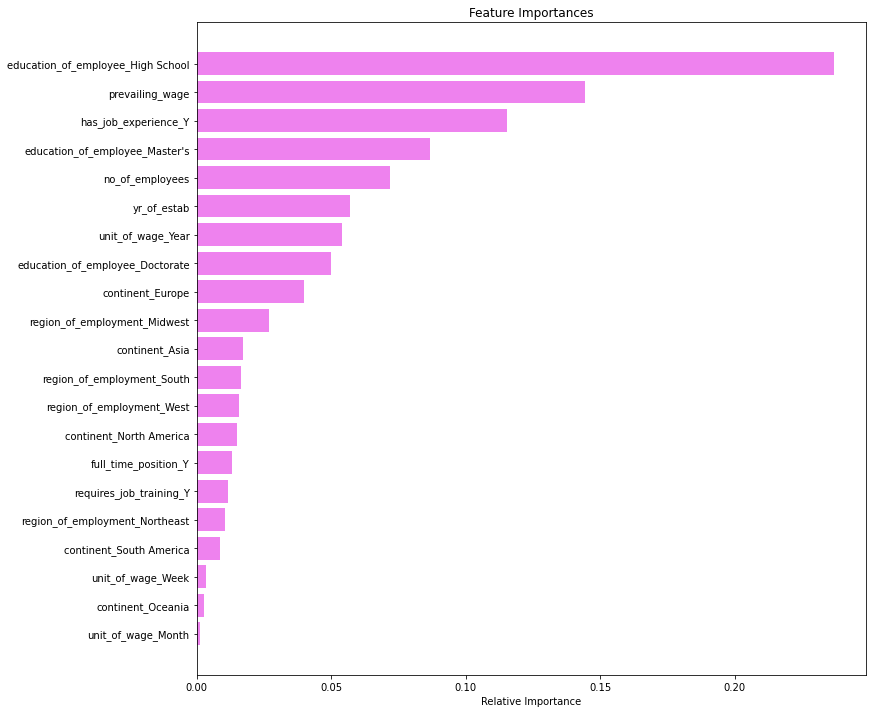

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education is the most important feature in identifying a correct visa application decision, followed by prevailing wage and job experience.

## Conclusions and Recommendations

**Analysis**
- Based on our analysis, we can say that the best profile, with over 80% prediction rate, for correct visa decisions hinges on the following features: 
    - Higher education levels. Higher education levels lead to higher visa approvals and lower leads to more denials.
    - Higher prevailing wage leads to higher approvals and viceversa.
    - More job experience. Applicants with job experience have a 76% chance of approval, while those without have only a 56% chance of approval.
    - Longer unit wage (yearly). Hourly-paid jobs lead to a low visa approval rate of 36%, while yearly-contracted jobs have almost a 70% approval rate.
    - Lower applicants from South America, who cover only 3% of applications from all continents. South America has the lowest approval rate at just under 60%.

**Recommendations**
- The OFLC should focus on profiles with higher education, prevailing wage and job experience, as these are the most important factors in determining whether or not to approve or reject a visa application. For example, a PhD applicant being approved 90% of the time, while a high school-level applicant only gets approved 36% of the time.

- Given that 90% of jobs are for full-time positions and 90% of salaries are linked to yearly pay structures, the OFLC should focus on applicants whose profile matches these criteria.

- The OFLC should target employee profiles with job training from Asia and Europe, as both features cover over 80% of all applicants.

- Due to the fact that over 80% of applicants target the Northeast, South and West regions in the US, the OFLC should focus on profiles interested in jobs in these regions and limit (marketing activities) that focus on the Midwest.

- Once the desired performance is achieved from the model, the OFLC can use it to identify the correct applications to approve and deny, with over 80% accuracy. This will help to reduce the cost and increase the efficiency of the visa process.

___